In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string

In [35]:
data = pd.read_csv('./IMDB Dataset.csv')

## EDA


In [36]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

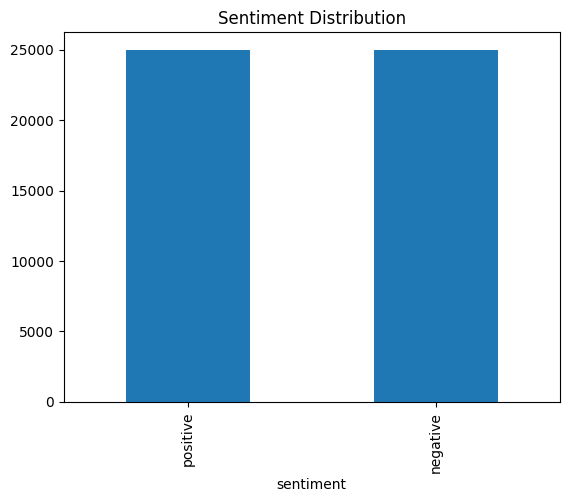

In [38]:
# Sentiment Distribution
data['sentiment'].value_counts().plot(kind='bar', title="Sentiment Distribution")

Nhận xét: data review có tỉ lệ cân bằng giữa số review có trạng thái cảm xúc tích cực và trạng thái cảm xúc tiêu cực

In [39]:
# Review length
# tạo thêm cột độ dài review
data['review_length'] = data['review'].apply(lambda x: len(x.split()))

(array([   0,  200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000,
        2200, 2400]),
 [Text(0, 0, '0'),
  Text(200, 0, '200'),
  Text(400, 0, '400'),
  Text(600, 0, '600'),
  Text(800, 0, '800'),
  Text(1000, 0, '1000'),
  Text(1200, 0, '1200'),
  Text(1400, 0, '1400'),
  Text(1600, 0, '1600'),
  Text(1800, 0, '1800'),
  Text(2000, 0, '2000'),
  Text(2200, 0, '2200'),
  Text(2400, 0, '2400')])

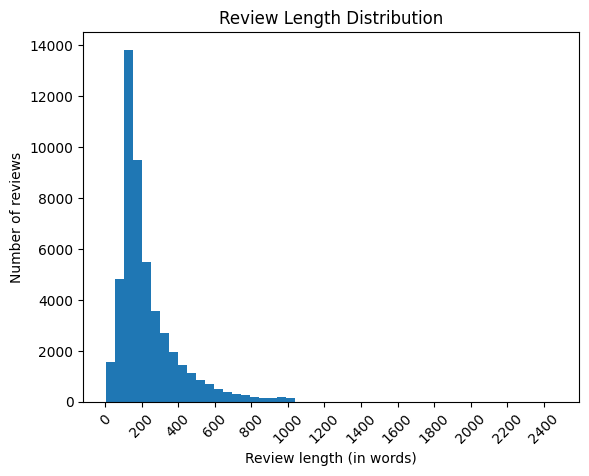

In [40]:
data['review_length'].plot(kind='hist', bins=50, title="Review Length Distribution")
plt.xlabel('Review length (in words)')
plt.ylabel('Number of reviews')

plt.xticks(range(0, max(data['review_length']) + 1, 200))  # Thay đổi khoảng cách nhãn
plt.xticks(rotation=45)  # Xoay nhãn x 45 độ


In [41]:
data[data['review_length']<20].shape

(27, 3)

In [42]:
# Tính phân vị 40% và 60%
lower_bound = data['review_length'].quantile(0.40)
upper_bound = data['review_length'].quantile(0.60)

print(f"Khoảng độ dài bình luận tập trung nhiều nhất từ {lower_bound:.0f} đến {upper_bound:.0f} từ.")


Khoảng độ dài bình luận tập trung nhiều nhất từ 151 đến 204 từ.


*Nhận xét:

Dựa vào biểu đồ histogram, có thể thấy các bình luận có độ dài tương đối đồng đều.

Có rất ít bình luận ngắn hơn 20 từ, chỉ 27 trên tổng số 50000 bình luận

Bình luận thường nằm trong khoảng 151 đến 204 từ cho thấy các bình luận có độ dài vừa phải, không quá ngắn để thiếu thông tin cũng như không quá dài để gây khó khăn trong việc truyền đạt ý kiến.

Điều này có thể cho thấy rằng những người review đang cung cấp một cái nhìn đầy đủ và có chiều sâu về film.



## Tiền xử lý dữ liệu

In [43]:
data.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [44]:
# làm sạch dữ liệu - loại bỏ những ký tự không mang ý nghĩa trong việc đánh giá
def clean(text):
    text = text.lower() # chuyển về chữ thường hết
    text = re.sub('<.*?>+', '', text) # loại bỏ các tag HTML
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # loại bỏ dấu câu
    text = re.sub('\n', '', text) # loại bỏ dấu xuống dòng
    text = re.sub('[\'"...]', '', text) # loại bỏ dấu các ngoặc kép
    text = re.sub('https?://\S+|www\.\S+', '', text) # loại bỏ các đường link

    #loại bỏ emoji:
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text
data['review'] = data['review'].apply(clean)

In [45]:
data.head()

,review,sentiment,review_length
0,one of the other reviewers has mentioned that ...,positive,307
1,a wonderful little production the filming tech...,positive,162
2,i thought this was a wonderful way to spend ti...,positive,166
3,basically theres a family where a little boy j...,negative,138
4,petter matteis love in the time of money is a ...,positive,230


In [46]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'him', 'over', 'during', 'same', 'very', 'be', "didn't", 'been', 'theirs', "needn't", 'yourself', 'are', 'between', 'didn', 'only', "you'll", 'did', 'on', 'here', "mightn't", 'doesn', "you've", 'do', 'until', 'what', 'up', 't', 'then', 'where', 'the', 'why', "doesn't", "should've", 'couldn', 'its', 'these', 'about', 'an', 'nor', 're', 'off', 'will', 'myself', 'them', 'of', 'further', 'i', 'it', 'can', 'hadn', 'should', "aren't", 'don', 'at', 'above', 'me', 'whom', 'because', 'needn', 'y', "haven't", 'how', 'am', 'down', "you'd", 'ourselves', 'their', "couldn't", 'while', 'below', "isn't", 'all', 'they', 'this', 'being', 'our', 'aren', 'she', 'again', 'under', "hadn't", 'm', 'those', 's', "won't", 'had', 'hers', 'such', 'her', 'ma', "don't", 'o', 'but', 've', 'd', 'shouldn', 'shan', 'from', 'll', 'his', 'if', 'and', 'has', 'herself', 'your', 'having', "weren't", 'to', 'that', "hasn't", 'after', 'out', 'than', 'does', 'my', 'have', 'mustn', 'no', 'himself', 'other', 'before', 'he', 'you

In [48]:
def remove_stopwords(text):
    if text is None:  # Kiểm tra nếu text là None
        return ''
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

data['review'] = data['review'].apply(remove_stopwords)

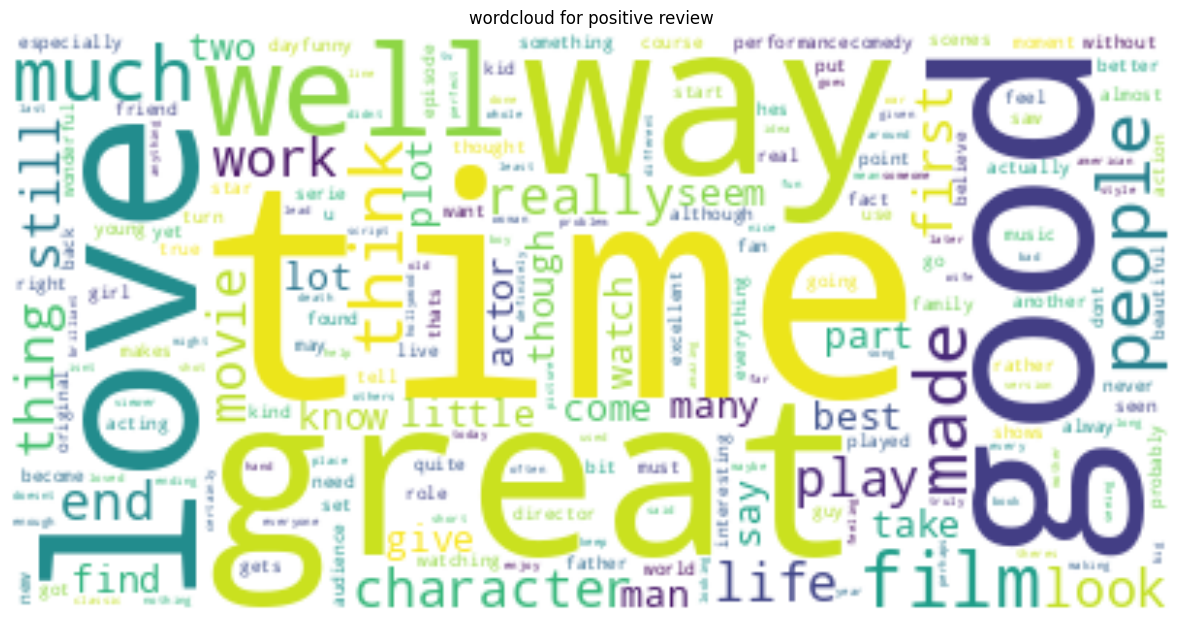

In [61]:
text = " ".join(i for i in data[data['sentiment']=='positive']['review'])
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

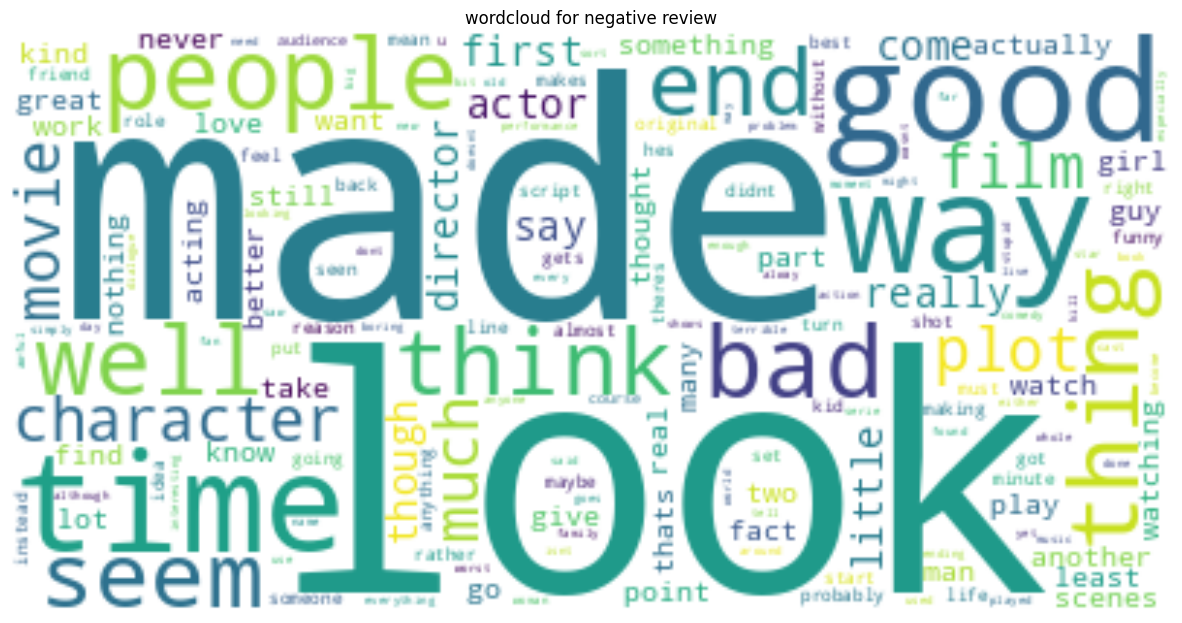

In [62]:
text = " ".join(i for i in data[data['sentiment']=='negative']['review'])
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

Nhận xét:

Những từ xuất hiện nhiều ở cả positive và negative review, làm cho việc phân loại trở nên khó khăn hơn là "film", "movie", "even", "one", "character", "show","story", "see", "make", "scene".

Ta sẽ tiến hành loại bỏ chúng

In [60]:
most_frequency_words = ['movie','film','even','one','character', 'show','story','see','make','scene']
def remove_most_frequency_words(text):
    if text is None:  # Kiểm tra nếu text là None
        return ''
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in most_frequency_words]
    return ' '.join(filtered_words)
data['review'] = data['review'].apply(remove_most_frequency_words)

## Chuyển đổi dữ liệu từ text sang ma trận số

Project này sử dụng kỹ thuật Bag of Words để chuyển đổi các review dạng text về ma trận số để mô hình có thể xử lý

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data['review'])

print(X)

# biểu diễn ma trận:
# (x, y) z
# từ có index y hiển thị z lần trong văn bản thứ x

  (0, 163209)	1
  (0, 123484)	1
  (0, 212111)	2
  (0, 143240)	5
  (0, 64541)	2
  (0, 220084)	1
  (0, 93684)	1
  (0, 163981)	2
  (0, 66499)	1
  (0, 87831)	1
  (0, 124089)	1
  (0, 73582)	2
  (0, 195591)	1
  (0, 187142)	2
  (0, 29026)	1
  (0, 205253)	1
  (0, 169441)	1
  (0, 209791)	4
  (0, 173770)	1
  (0, 217164)	1
  (0, 82285)	1
  (0, 202164)	1
  (0, 69037)	1
  (0, 89460)	1
  (0, 198060)	1
  :	:
  (49999, 111998)	1
  (49999, 100370)	1
  (49999, 67387)	1
  (49999, 17144)	1
  (49999, 88195)	1
  (49999, 133137)	1
  (49999, 98236)	1
  (49999, 97614)	1
  (49999, 69621)	1
  (49999, 14912)	1
  (49999, 201239)	1
  (49999, 108050)	1
  (49999, 183117)	1
  (49999, 121817)	1
  (49999, 161740)	1
  (49999, 64582)	1
  (49999, 30862)	1
  (49999, 134547)	1
  (49999, 35067)	1
  (49999, 67472)	1
  (49999, 83315)	1
  (49999, 161707)	1
  (49999, 130506)	1
  (49999, 46413)	1
  (49999, 219951)	1


## Chia tập dữ liệu để huấn luyện và kiểm tra

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
# Tập huấn luyện gồm 80% số lượng mẫu
# Tập kiểm tra gồm 20% số lượng mẫu
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=42)

## Huấn luyện mô hình Multinomial Naive Bayes

---



In [67]:
from sklearn.naive_bayes import MultinomialNB

In [68]:
# Tạo mô hình Multinomial Naive Bayes
model = MultinomialNB()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

## Đánh giá mô hình

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100}%')

Accuracy: 86.45%


In [75]:
# Vẽ confusion matrix giữa giá trị của dự đoán và giá trị được gắn nhãn trong tập dữ liệu cho trước
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

      0     1
0  4365   596
1   759  4280


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      4961
    positive       0.88      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Nhận xét và giải thích các thông số:

1. Accuracy - Độ chính xác của mô hình đạt 86.45%, điều đó cho thấy rằng nếu mô hình gặp 100 mẫu thì sẽ dự đoán được đúng khoảng 86 mẫu trong đó

2. Confusion Matrix trên tập test gồm 10000 mẫu:

  Vị trí (0,0) - true negative là số lượng mẫu negative được dự đoán đúng - Ở đây là 4365 mẫu

  Vị trí (1,1) - true positive là số lượng mẫu positive được dự đúng - Ở đây là 4280 mẫu

  Vị trí (0,1) - false positive là số lượng mẫu negative bị dự đoán sai thành positive - Ở đây là 596 mẫu

  Vị trí (1,0) - false negative là số lượng mẫu positive bị dự đoán sai thành negative - Ở đây là 759 mẫu

3. Classification report:
    
* Precision: Trong số các bình luận được dự đoán là loại X, có bao nhiêu % là chính xác:

    * Presicion của positive = TP/(TP + FP) = 88%

    * Precision của negative = TN/(TN + FN) = 85%
    

  * Recall: Trong số các bình luận thực tế là loại X, có bao nhiêu % được dự đoán chính xác

    * Recall của positive = TP/(TP + TN) = 85%

    * Recall của negative = TN/(TN + FP) = 88%

  *F1-Score:
    - F1-Score là chỉ số kết hợp giữa Precision và Recall để cân bằng giữa hai yếu tố này
    - F1-Score = 2 x Precision x Recall / (Precision + Recall)
    - F1-Score dao động từ 0 tới 1
    * F1-Score càng lớn chứng tỏ mô hình càng cân bằng
    * F1-Score của mô hình này là 0.87 cho Positive và 0.86 cho Negative, cho thấy mô hình hoạt động với độ chính xác khá cao.
  

    




# Huấn luyện bằng mô hình Bernoulli Naive Bayes

In [90]:
from sklearn.naive_bayes import BernoulliNB

In [92]:
# Tạo mô hình Multinomial Naive Bayes
model2 = BernoulliNB()

# Huấn luyện mô hình
model2.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred2 = model2.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [94]:
print(f'Accuracy: {accuracy_score(y_test, y_pred2) * 100}%')

print("\nConfusion Matrix: ")
print(pd.DataFrame(confusion_matrix(y_test, y_pred2)))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred2))

Accuracy: 85.54%

Confusion Matrix: 
      0     1
0  4397   564
1   882  4157

Classification Report: 
              precision    recall  f1-score   support

    negative       0.83      0.89      0.86      4961
    positive       0.88      0.82      0.85      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Nhận xét:

Với tập dữ liệu này, mô hình Multinomial Naive Bayes thể hiện các thông số đánh giá tốt hơn so với Bernoulli Naive Bayes.

Điều này có lý vì Multinomial NB xem xét đến tần số của từ ngữ, chứ không chỉ quan tâm từ ngữ đó xuất hiện hay không như Bernoulli NB, từ đó có thể đánh giá ngữ nghĩa tốt hơn và đạt được độ chính xác phân loại cao hơn

## Tiếp tục sử dụng mô hình Multinomial NB để dự đoán cho câu mới

In [110]:
def predict_review(new_review):
    processed_review = clean(new_review)
    X_new_review_vectorized = vectorizer.transform([processed_review])
    prediction = model.predict(X_new_review_vectorized)
    return prediction[0]

In [118]:
new_review = input('Nhập vào chuỗi review mới (bằng tiếng Anh :D ): ')
result = predict_review(new_review)
print(f"Review: '{new_review}' => Sentiment: {result}")

Nhập vào chuỗi review mới (bằng tiếng Anh :D ): This was the worst experience I've ever had.
Review: 'This was the worst experience I've ever had.' => Sentiment: negative


In [ ]:
# sample data:
# I absolutely love this movie! It's fantastic.
# This was the worst experience I've ever had.